# Trying to analyze player performances from the premier league 24/25 season

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/home/abhinay/python/test/data/data.csv")
df.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0


In [3]:
df.describe()

,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Big Chances Missed,Hit Woodwork,Offsides,Touches,...,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,...,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,20.581851,1336.208185,1.713523,1.145907,17.526690,5.514235,2.135231,0.496441,2.250890,857.033808,...,0.058719,14.295374,2.756228,0.092527,4.161922,0.024911,0.145907,0.467972,1.304270,0.068505
std,12.136239,1055.099340,3.310674,2.197891,22.342341,9.407054,3.732051,0.986986,4.085456,729.009027,...,0.277056,15.040111,2.750985,0.307913,18.616319,0.187160,0.473986,2.832182,6.230133,0.635313
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.200000
25%,10.000000,336.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,199.250000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,1156.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,700.500000,...,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,2229.250000,2.000000,2.000000,25.000000,7.000000,3.000000,1.000000,3.000000,1356.750000,...,0.000000,22.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,3420.000000,29.000000,18.000000,130.000000,61.000000,27.000000,6.000000,28.000000,3347.000000,...,3.000000,73.000000,12.000000,2.000000,153.000000,2.000000,3.000000,28.000000,56.000000,6.000000


## Separating Players Based on Position

### Forwards

In [4]:
forward = df[df.Position == 'FWD']
forward.sort_values(by='Goals', ascending=False)

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
391,Alexander Isak,Newcastle United,Sweden,FWD,34,2769,23,0,99,14,...,27,1,0,0,0%,0,0,0,0,0.0
335,Erling Haaland,Manchester City,Norway,FWD,31,2741,22,3,108,6,...,24,2,0,0,0%,0,0,0,0,0.0
417,Chris Wood,Nottingham Forest,New Zealand,FWD,36,2976,20,3,68,2,...,25,1,0,0,0%,0,1,0,0,0.0
107,Yoane Wissa,Brentford,DR Congo,FWD,35,2927,19,0,90,13,...,34,5,0,0,0%,0,0,0,0,0.0
46,Ollie Watkins,Aston Villa,England,FWD,38,2610,16,8,84,17,...,29,2,0,0,0%,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Callum Wilson,Newcastle United,England,FWD,18,357,0,0,6,0,...,4,1,0,0,0%,0,0,0,0,0.0
490,Mikey Moore,Tottenham Hotspur,England,FWD,10,361,0,1,3,0,...,3,0,0,0,0%,0,0,0,0,0.0
478,Dane Scarlett,Tottenham Hotspur,England,FWD,3,31,0,0,1,0,...,0,0,0,0,0%,0,0,0,0,0.0
499,Will Lankshear,Tottenham Hotspur,England,FWD,3,10,0,0,0,0,...,2,0,0,0,0%,0,0,0,0,0.0


### Midfielders

In [5]:
midfielder = df[df.Position == 'MID']
midfielder.sort_values(by='Assists', ascending=False)

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
324,Mohamed Salah,Liverpool,Egypt,MID,38,3377,29,18,130,22,...,25,1,0,0,0%,0,0,0,0,0.0
399,Jacob Murphy,Newcastle United,England,MID,35,2379,8,12,43,4,...,11,4,0,0,0%,0,0,0,0,0.0
415,Anthony Elanga,Nottingham Forest,Sweden,MID,38,2507,6,11,44,19,...,9,1,0,0,0%,0,0,0,0,0.0
45,Morgan Rogers,Aston Villa,England,MID,37,3129,8,10,55,6,...,50,10,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Carlos Forbs,Wolverhampton Wanderers,Portugal,MID,10,232,0,0,2,0,...,2,2,0,0,0%,0,0,0,0,0.0
531,André,Wolverhampton Wanderers,Brazil,MID,33,2484,0,0,10,1,...,36,7,0,0,0%,0,0,0,0,0.0
547,Mateus Mané,Wolverhampton Wanderers,England,MID,1,1,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
552,Pablo Sarabia,Wolverhampton Wanderers,Spain,MID,23,805,3,0,17,0,...,16,3,0,0,0%,0,0,0,0,0.0


### Defenders

In [6]:
defender = df[df.Position == 'DEF']
defender.sort_values(by='Tackles', ascending=False)

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
175,Daniel Muñoz,Crystal Palace,Colombia,DEF,37,3233,4,5,37,24,...,56,10,0,0,0%,0,0,0,0,0.0
542,João Gomes,Wolverhampton Wanderers,Brazil,DEF,36,2987,3,0,35,14,...,70,9,1,0,0%,0,0,0,0,0.0
383,Noussair Mazraoui,Manchester United,Morocco,DEF,37,2848,0,1,13,2,...,38,3,0,0,0%,0,0,0,0,0.0
222,Antonee Robinson,Fulham,United States,DEF,36,3167,0,10,16,1,...,0,8,0,0,0%,0,1,0,0,0.0
191,Tyrick Mitchell,Crystal Palace,England,DEF,37,3102,0,5,12,1,...,23,2,0,0,0%,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Mason Holgate,Southampton,Jamaica,DEF,1,5,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
516,Kaelan Casey,West Ham United,England,DEF,1,1,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
471,Alfie Dorrington,Tottenham Hotspur,England,DEF,1,13,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
530,Alfie Pond,Wolverhampton Wanderers,England,DEF,1,1,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0


### Goalkeepers

In [7]:
goalkeeper = df[df.Position == 'GKP']
goalkeeper.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
18,Neto,Arsenal,Brazil,GKP,2,180,0,0,0,0,...,0,0,0,11,0%,0,0,2,2,0.0
32,Emiliano Martínez,Aston Villa,Argentina,GKP,37,3195,0,0,0,0,...,2,5,1,100,69%,1,0,3,56,1.2
48,Robin Olsen,Aston Villa,Sweden,GKP,4,225,0,0,0,0,...,0,0,0,8,0%,0,0,1,3,0.0
67,Kepa,Bournemouth,Spain,GKP,31,2790,0,0,1,0,...,2,3,0,97,71%,0,0,21,22,2.1


## Let me only keep the necessary columns for each position

In [8]:
# Lets see what columns are there in the dataframe
df.columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented'],
      

### Forwards

In [9]:
# For forwards
fwdColumns = ['Player Name', 'Club', 'Nationality', 'Position', 'Appearances', 'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
              'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides', 'Touches', 'Passes', 'Carries Ended with Shot',
              'Carries Ended with Chance', 'Dispossessed']

forward = forward[fwdColumns]
forward

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed
5,Gabriel Jesus,Arsenal,Brazil,FWD,17,603,3,0,20,0,0%,3,1,9,328,0,0,0,13
11,Kai Havertz,Arsenal,Germany,FWD,23,1874,9,3,53,2,0%,15,0,14,837,528,0,0,23
17,Nathan Butler-Oyedeji,Arsenal,England,FWD,1,6,0,0,1,0,0%,0,0,0,1,0,0,0,0
30,Donyell Malen,Aston Villa,Netherlands,FWD,14,298,3,0,15,0,0%,4,1,2,145,0,0,0,7
36,Jhon Durán,Aston Villa,Colombia,FWD,20,626,7,0,31,0,0%,7,0,5,295,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,Danny Ings,West Ham United,England,FWD,15,270,1,2,14,0,0%,2,1,0,151,0,0,0,6
511,Evan Ferguson,West Ham United,Ireland,FWD,21,387,1,0,12,0,0%,3,0,0,174,0,0,0,11
524,Michail Antonio,West Ham United,Jamaica,FWD,14,844,1,1,19,0,0%,5,1,4,326,0,0,0,19
526,Niclas Füllkrug,West Ham United,Germany,FWD,18,788,3,2,16,0,0%,0,2,10,293,0,0,0,7


In [10]:
highScoringForwards = forward[forward.Goals >= 10]
highScoringForwards.sort_values(by='Goals')[::-1]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed
391,Alexander Isak,Newcastle United,Sweden,FWD,34,2769,23,0,99,14,13%,18,3,20,1131,1424,9,2,55
335,Erling Haaland,Manchester City,Norway,FWD,31,2741,22,3,108,6,20%,21,4,4,696,1032,0,0,27
417,Chris Wood,Nottingham Forest,New Zealand,FWD,36,2976,20,3,68,2,7%,15,1,28,827,657,2,1,28
107,Yoane Wissa,Brentford,DR Congo,FWD,35,2927,19,0,90,13,7%,17,1,14,1020,1933,6,10,35
46,Ollie Watkins,Aston Villa,England,FWD,38,2610,16,8,84,17,14%,27,2,16,784,286,12,4,50
180,Jean-Philippe Mateta,Crystal Palace,France,FWD,37,2654,14,2,70,5,9%,18,2,21,835,551,3,5,45
310,Cody Gakpo,Liverpool,Netherlands,FWD,35,1938,10,4,57,51,12%,6,1,5,971,1310,44,27,24
129,Kaoru Mitoma,Brighton & Hove Albion,Japan,FWD,36,2608,10,4,57,14,4%,12,1,5,1479,1048,9,11,23
155,Nicolas Jackson,Chelsea,Senegal,FWD,30,2238,10,5,76,32,9%,19,6,23,769,599,37,17,41
116,Danny Welbeck,Brighton & Hove Albion,England,FWD,30,2122,10,0,60,2,0%,9,2,4,791,1502,1,0,28


## ATP i dont think some of the values are legitimate so i'll cross check for it on the pl website 

In [11]:
forward[forward['Player Name'] == 'Erling Haaland']

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed
335,Erling Haaland,Manchester City,Norway,FWD,31,2741,22,3,108,6,20%,21,4,4,696,1032,0,0,27


### Player with 22 goals having 6 shots on target doesnt make any sense, so dropping that col

In [12]:
df.drop(columns=['Shots On Target'], axis=1)

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Conversion %,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,13%,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,25%,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0%,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,15%,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0%,...,9,1,0,0,0%,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Santiago Bueno,Wolverhampton Wanderers,Uruguay,DEF,29,1682,0,0,6,0%,...,26,2,0,0,0%,0,0,0,0,0.0
558,Tom King,Wolverhampton Wanderers,Wales,GKP,1,1,0,0,0,0%,...,0,0,0,0,0%,0,0,0,0,0.0
559,Tommy Doyle,Wolverhampton Wanderers,England,MID,24,475,0,1,9,0%,...,5,1,0,0,0%,0,0,0,0,0.0
560,Toti Gomes,Wolverhampton Wanderers,Portugal,DEF,31,2615,0,0,7,7%,...,24,7,0,0,0%,0,2,0,0,0.0


### Updating forward column

In [13]:
fwdColumns = ['Player Name', 'Club', 'Nationality', 'Position', 'Appearances', 'Minutes', 'Goals', 'Assists', 'Shots', 'Conversion %', 
              'Big Chances Missed', 'Hit Woodwork', 'Offsides', 'Touches', 'Passes', 'Carries Ended with Shot',
              'Carries Ended with Chance', 'Dispossessed']

forward = forward[fwdColumns]

In [14]:
highScoringForwards = forward[forward.Goals >= 10]
highScoringForwards.sort_values(by='Goals')[::-1]


,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed
391,Alexander Isak,Newcastle United,Sweden,FWD,34,2769,23,0,99,13%,18,3,20,1131,1424,9,2,55
335,Erling Haaland,Manchester City,Norway,FWD,31,2741,22,3,108,20%,21,4,4,696,1032,0,0,27
417,Chris Wood,Nottingham Forest,New Zealand,FWD,36,2976,20,3,68,7%,15,1,28,827,657,2,1,28
107,Yoane Wissa,Brentford,DR Congo,FWD,35,2927,19,0,90,7%,17,1,14,1020,1933,6,10,35
46,Ollie Watkins,Aston Villa,England,FWD,38,2610,16,8,84,14%,27,2,16,784,286,12,4,50
180,Jean-Philippe Mateta,Crystal Palace,France,FWD,37,2654,14,2,70,9%,18,2,21,835,551,3,5,45
310,Cody Gakpo,Liverpool,Netherlands,FWD,35,1938,10,4,57,12%,6,1,5,971,1310,44,27,24
129,Kaoru Mitoma,Brighton & Hove Albion,Japan,FWD,36,2608,10,4,57,4%,12,1,5,1479,1048,9,11,23
155,Nicolas Jackson,Chelsea,Senegal,FWD,30,2238,10,5,76,9%,19,6,23,769,599,37,17,41
116,Danny Welbeck,Brighton & Hove Albion,England,FWD,30,2122,10,0,60,0%,9,2,4,791,1502,1,0,28


In [15]:
(20/68)*100

29.411764705882355

### Conversion rate doesn't make sense aswell 
#### Will drop this col and create a new one just for the high performing players which will be `(goals/total shots)*100`

In [16]:
df.drop(columns=['Conversion %'], axis=1)

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Santiago Bueno,Wolverhampton Wanderers,Uruguay,DEF,29,1682,0,0,6,3,...,26,2,0,0,0%,0,0,0,0,0.0
558,Tom King,Wolverhampton Wanderers,Wales,GKP,1,1,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
559,Tommy Doyle,Wolverhampton Wanderers,England,MID,24,475,0,1,9,0,...,5,1,0,0,0%,0,0,0,0,0.0
560,Toti Gomes,Wolverhampton Wanderers,Portugal,DEF,31,2615,0,0,7,8,...,24,7,0,0,0%,0,2,0,0,0.0


In [17]:
df['Conversion Rate'] = (df.Goals / df.Shots) * 100 
# Rounding off the values to 2 decimal places
df['Conversion Rate'] = df['Conversion Rate'].round(2)
# Updating nan values to 0
df['Conversion Rate'] = df['Conversion Rate'].fillna(0)
df.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented,Conversion Rate
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,2,0,0,0%,0,0,0,0,0.0,0.00
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,3,0,0,0%,0,0,0,0,0.0,8.96
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,3,0,86,72%,0,0,8,53,2.1,0.00
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,5,1,0,0%,0,0,0,0,0.0,8.33
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,1,0,0,0%,0,0,0,0,0.0,16.67


## Updating the forwards (once again 😫)

In [18]:
# First, recreate forward from the updated df
forward = df[df.Position == 'FWD']

# Then select columns
fwdColumns = ['Player Name', 'Club', 'Nationality', 'Position', 'Appearances', 'Minutes', 'Goals', 'Assists', 'Shots','Conversion Rate',
              'Big Chances Missed', 'Hit Woodwork', 'Offsides', 'Touches', 'Passes', 'Carries Ended with Shot',
              'Carries Ended with Chance', 'Dispossessed']
forward = forward[fwdColumns]
forward

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Conversion Rate,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed
5,Gabriel Jesus,Arsenal,Brazil,FWD,17,603,3,0,20,15.00,3,1,9,328,0,0,0,13
11,Kai Havertz,Arsenal,Germany,FWD,23,1874,9,3,53,16.98,15,0,14,837,528,0,0,23
17,Nathan Butler-Oyedeji,Arsenal,England,FWD,1,6,0,0,1,0.00,0,0,0,1,0,0,0,0
30,Donyell Malen,Aston Villa,Netherlands,FWD,14,298,3,0,15,20.00,4,1,2,145,0,0,0,7
36,Jhon Durán,Aston Villa,Colombia,FWD,20,626,7,0,31,22.58,7,0,5,295,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,Danny Ings,West Ham United,England,FWD,15,270,1,2,14,7.14,2,1,0,151,0,0,0,6
511,Evan Ferguson,West Ham United,Ireland,FWD,21,387,1,0,12,8.33,3,0,0,174,0,0,0,11
524,Michail Antonio,West Ham United,Jamaica,FWD,14,844,1,1,19,5.26,5,1,4,326,0,0,0,19
526,Niclas Füllkrug,West Ham United,Germany,FWD,18,788,3,2,16,18.75,0,2,10,293,0,0,0,7


In [19]:
highScoringForwards = forward[forward.Goals >= 10]
highScoringForwards.sort_values(by='Goals')[::-1]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Conversion Rate,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed
391,Alexander Isak,Newcastle United,Sweden,FWD,34,2769,23,0,99,23.23,18,3,20,1131,1424,9,2,55
335,Erling Haaland,Manchester City,Norway,FWD,31,2741,22,3,108,20.37,21,4,4,696,1032,0,0,27
417,Chris Wood,Nottingham Forest,New Zealand,FWD,36,2976,20,3,68,29.41,15,1,28,827,657,2,1,28
107,Yoane Wissa,Brentford,DR Congo,FWD,35,2927,19,0,90,21.11,17,1,14,1020,1933,6,10,35
46,Ollie Watkins,Aston Villa,England,FWD,38,2610,16,8,84,19.05,27,2,16,784,286,12,4,50
180,Jean-Philippe Mateta,Crystal Palace,France,FWD,37,2654,14,2,70,20.00,18,2,21,835,551,3,5,45
310,Cody Gakpo,Liverpool,Netherlands,FWD,35,1938,10,4,57,17.54,6,1,5,971,1310,44,27,24
129,Kaoru Mitoma,Brighton & Hove Albion,Japan,FWD,36,2608,10,4,57,17.54,12,1,5,1479,1048,9,11,23
155,Nicolas Jackson,Chelsea,Senegal,FWD,30,2238,10,5,76,13.16,19,6,23,769,599,37,17,41
116,Danny Welbeck,Brighton & Hove Albion,England,FWD,30,2122,10,0,60,16.67,9,2,4,791,1502,1,0,28


/tmp/ipykernel_4536/953670266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highScoringForwards['Last Name'] = highScoringForwards['Player Name'].str.split().str[-1]


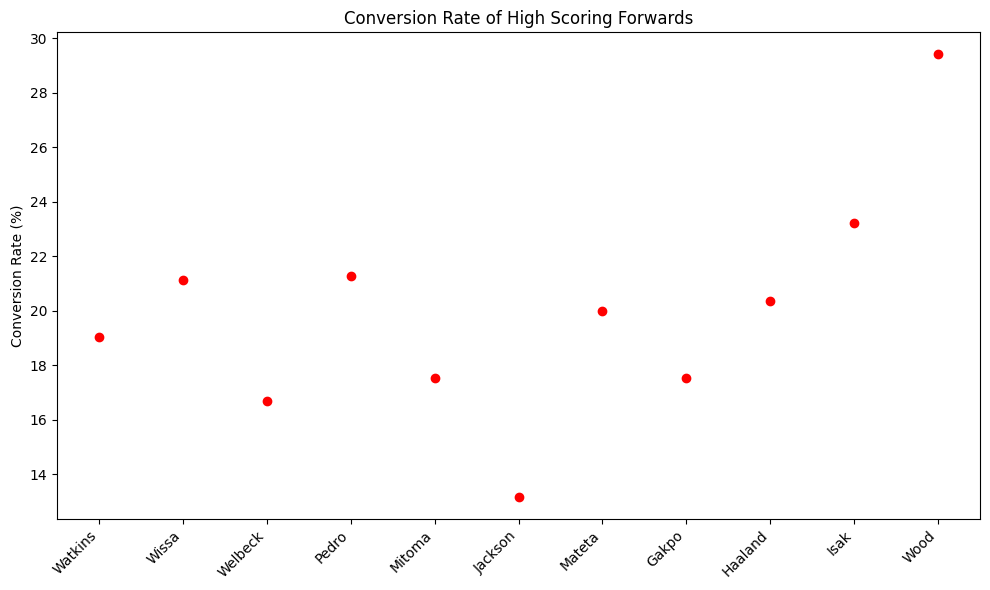

In [20]:
highScoringForwards['Last Name'] = highScoringForwards['Player Name'].str.split().str[-1]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(highScoringForwards)), highScoringForwards['Conversion Rate'], color='red')
plt.xticks(range(len(highScoringForwards)), highScoringForwards['Last Name'], rotation=45, ha='right')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate of High Scoring Forwards')
plt.tight_layout()
plt.show()

In [21]:
midfielder

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0
7,Gabriel Martinelli,Arsenal,Brazil,MID,33,2300,8,4,55,12,...,16,1,0,0,0%,0,0,0,0,0.0
9,Jorginho,Arsenal,Italy,MID,15,702,0,0,2,0,...,15,5,0,0,0%,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,Mateus Mané,Wolverhampton Wanderers,England,MID,1,1,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
548,Matheus Cunha,Wolverhampton Wanderers,Brazil,MID,33,2600,15,6,110,4,...,42,4,0,0,0%,0,0,0,0,0.0
552,Pablo Sarabia,Wolverhampton Wanderers,Spain,MID,23,805,3,0,17,0,...,16,3,0,0,0%,0,0,0,0,0.0
555,Rodrigo Gomes,Wolverhampton Wanderers,Portugal,MID,25,797,2,0,7,0,...,4,0,0,0,0%,0,0,0,0,0.0


In [22]:
df.columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented',
       

In [23]:
midfielder = df[df.Position == 'MID']

midColumns = ['Player Name', 'Club', 'Nationality', 'Position', 'Appearances', 'Minutes', 'Goals', 'Assists', 'Shots', 'Big Chances Missed',
              'Hit Woodwork', 'Offsides','Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses', 'Successful Crosses', 'Crosses %', 'fThird Passes',
              'Successful fThird Passes', 'fThird Passes %', 'Through Balls', 'Carries', 'Progressive Carries', 'Carries Ended with Goal',
              'Carries Ended with Assist', 'Carries Ended with Shot','Carries Ended with Chance', 'Possession Won', 'Dispossessed', 'Interceptions', 'Blocks',
              'Tackles','Ground Duels', 'Fouls', 'Yellow Cards', 'Red Cards']
midfielder = midfielder[midColumns]
midfielder

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Big Chances Missed,...,Carries Ended with Chance,Possession Won,Dispossessed,Interceptions,Blocks,Tackles,Ground Duels,Fouls,Yellow Cards,Red Cards
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,8,...,0,44,40,15,14,29,58,15,3,0
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,2,...,22,121,32,13,5,53,342,21,5,1
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,0,0,17,0,0,11,0,9,1,0
7,Gabriel Martinelli,Arsenal,Brazil,MID,33,2300,8,4,55,8,...,6,66,38,10,3,23,237,16,1,0
9,Jorginho,Arsenal,Italy,MID,15,702,0,0,2,0,...,0,0,9,0,0,12,0,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,Mateus Mané,Wolverhampton Wanderers,England,MID,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,Matheus Cunha,Wolverhampton Wanderers,Brazil,MID,33,2600,15,6,110,2,...,4,70,55,15,4,38,150,42,4,0
552,Pablo Sarabia,Wolverhampton Wanderers,Spain,MID,23,805,3,0,17,5,...,0,0,14,0,0,16,0,16,3,0
555,Rodrigo Gomes,Wolverhampton Wanderers,Portugal,MID,25,797,2,0,7,0,...,0,0,9,0,0,23,0,4,0,0


In [24]:
highScoringMidfielders = midfielder[midfielder.Goals >= 8]
highScoringMidfielders.sort_values(by='Goals')[::-1]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Big Chances Missed,...,Carries Ended with Chance,Possession Won,Dispossessed,Interceptions,Blocks,Tackles,Ground Duels,Fouls,Yellow Cards,Red Cards
324,Mohamed Salah,Liverpool,Egypt,MID,38,3377,29,18,130,24,...,14,138,67,4,1,21,435,25,1,0
82,Bryan Mbeumo,Brentford,Cameroon,MID,38,3415,20,7,85,9,...,12,70,47,3,0,49,212,25,3,0
141,Cole Palmer,Chelsea,England,MID,37,3195,15,8,126,14,...,1,62,37,13,23,34,30,15,7,0
548,Matheus Cunha,Wolverhampton Wanderers,Brazil,MID,33,2600,15,6,110,2,...,4,70,55,15,4,38,150,42,4,0
398,Harvey Barnes,Newcastle United,England,MID,33,1755,9,4,63,6,...,6,67,23,15,0,16,110,15,0,0
220,Alex Iwobi,Fulham,Nigeria,MID,38,2994,9,0,68,3,...,19,140,40,14,1,44,222,19,1,0
485,James Maddison,Tottenham Hotspur,England,MID,31,1816,9,7,39,5,...,4,98,25,41,41,31,153,32,6,0
528,Tomás Soucek,West Ham United,Czech Republic,MID,35,2570,9,0,55,6,...,0,41,15,11,7,46,43,47,8,0
363,Amad Diallo,Manchester United,Cote D’Ivoire,MID,26,1901,8,6,47,1,...,4,72,35,26,7,38,155,21,5,0
367,Bruno Fernandes,Manchester United,Portugal,MID,36,3024,8,10,96,10,...,15,188,43,29,10,84,426,32,3,2


In [25]:
highassistingMidfielders = midfielder[midfielder.Assists >= 8]
highassistingMidfielders.sort_values(by='Assists')[::-1]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Big Chances Missed,...,Carries Ended with Chance,Possession Won,Dispossessed,Interceptions,Blocks,Tackles,Ground Duels,Fouls,Yellow Cards,Red Cards
324,Mohamed Salah,Liverpool,Egypt,MID,38,3377,29,18,130,24,...,14,138,67,4,1,21,435,25,1,0
399,Jacob Murphy,Newcastle United,England,MID,35,2379,8,12,43,5,...,5,83,37,8,4,0,141,11,4,0
415,Anthony Elanga,Nottingham Forest,Sweden,MID,38,2507,6,11,44,6,...,15,97,43,7,2,19,271,9,1,0
367,Bruno Fernandes,Manchester United,Portugal,MID,36,3024,8,10,96,10,...,15,188,43,29,10,84,426,32,3,2
45,Morgan Rogers,Aston Villa,England,MID,37,3129,8,10,55,11,...,3,142,74,36,42,43,151,50,10,0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,8,...,0,44,40,15,14,29,58,15,3,0
99,Mikkel Damsgaard,Brentford,Denmark,MID,38,2926,2,10,35,4,...,13,169,47,45,10,83,207,18,2,0
497,Son Heung-Min,Tottenham Hotspur,South Korea,MID,30,2116,7,9,57,7,...,11,83,32,11,2,17,214,6,1,0
514,Jarrod Bowen,West Ham United,England,MID,34,2979,0,8,87,8,...,1,79,77,26,13,41,106,20,1,0
426,Morgan Gibbs-White,Nottingham Forest,England,MID,34,2822,7,8,61,3,...,20,119,44,6,7,43,380,38,9,1


## There are way too many columns to get a proper output so i'm going to separate it into attacking and defensive mid 

In [26]:
defensivemidcolumns = midColumns = ['Player Name', 'Club', 'Nationality', 'Position', 'Appearances', 'Minutes', 'Goals', 'Assists', 'Touches', 'Passes',
                                    'Successful Passes', 'Passes%', 'Through Balls', 'Carries', 'Progressive Carries', 'Carries Ended with Goal',
                                    'Carries Ended with Assist', 'Carries Ended with Shot','Carries Ended with Chance', 'Possession Won','Dispossessed',
                                    'Interceptions', 'Blocks', 'Tackles','Ground Duels', 'Fouls', 'Yellow Cards', 'Red Cards']
defensivemidfielder = midfielder[defensivemidcolumns]

attackingmidcolumns = midColumns = ['Player Name', 'Club', 'Nationality', 'Position', 'Appearances', 'Minutes', 'Goals', 'Assists', 'Shots', 'Big Chances Missed',
              'Hit Woodwork', 'Offsides','Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses', 'Successful Crosses', 'Crosses %', 'fThird Passes',
              'Successful fThird Passes', 'fThird Passes %', 'Through Balls', 'Carries', 'Progressive Carries', 'Carries Ended with Goal',
              'Carries Ended with Assist', 'Carries Ended with Shot','Carries Ended with Chance', 'Dispossessed', 'Yellow Cards', 'Red Cards']
attackingmidfielder = midfielder[attackingmidcolumns]

In [27]:
highScoringForwards.head(5)

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Conversion Rate,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed,Last Name
46,Ollie Watkins,Aston Villa,England,FWD,38,2610,16,8,84,19.05,27,2,16,784,286,12,4,50,Watkins
107,Yoane Wissa,Brentford,DR Congo,FWD,35,2927,19,0,90,21.11,17,1,14,1020,1933,6,10,35,Wissa
116,Danny Welbeck,Brighton & Hove Albion,England,FWD,30,2122,10,0,60,16.67,9,2,4,791,1502,1,0,28,Welbeck
127,João Pedro,Brighton & Hove Albion,Brazil,FWD,27,1953,10,0,47,21.28,7,1,2,1057,789,3,5,38,Pedro
129,Kaoru Mitoma,Brighton & Hove Albion,Japan,FWD,36,2608,10,4,57,17.54,12,1,5,1479,1048,9,11,23,Mitoma


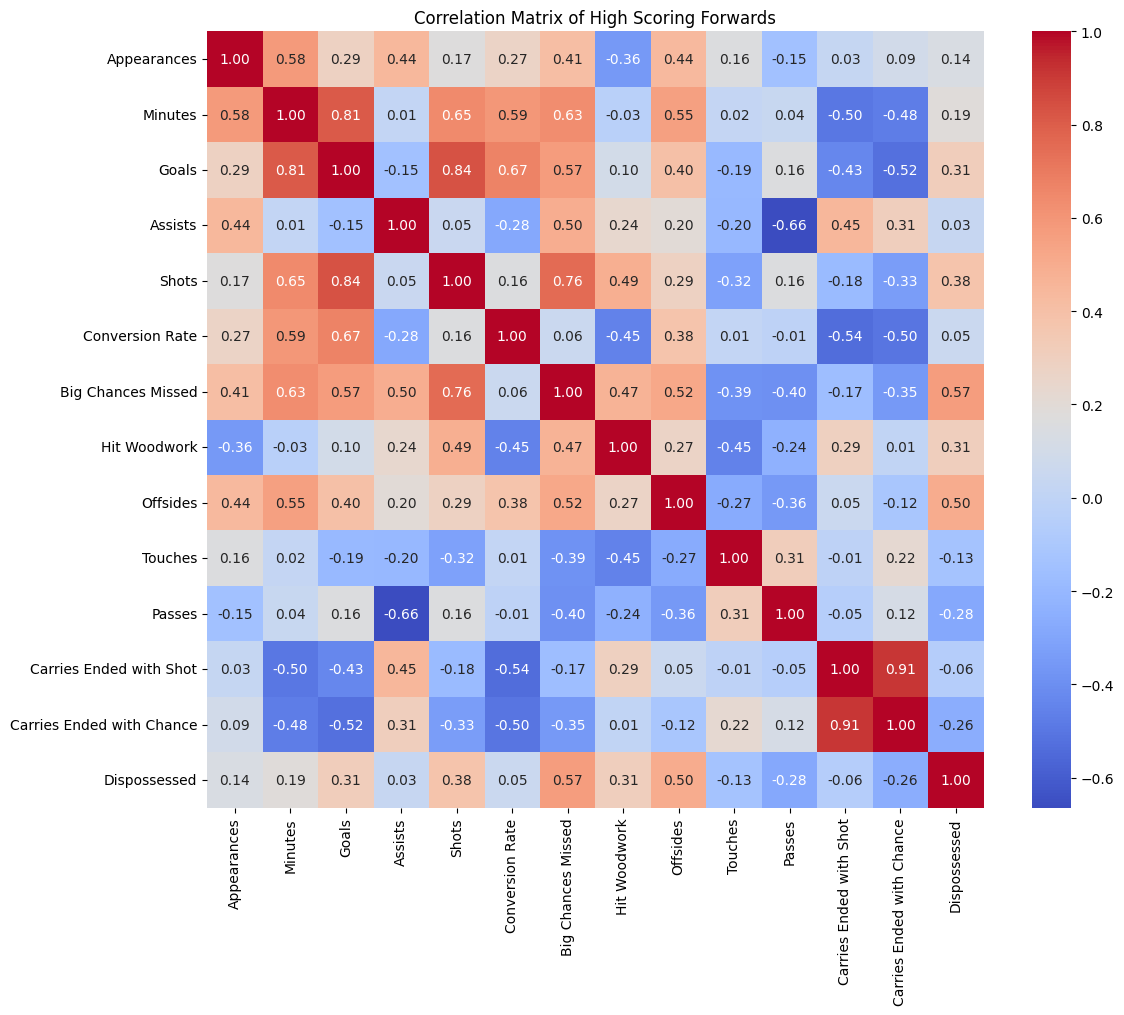

In [28]:
import seaborn as sns

# Get numeric columns only
numeric_cols = highScoringForwards.drop(['Player Name', 'Club', 'Nationality', 'Position', 'Last Name'], axis=1)

# Create correlation matrix with labels
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of High Scoring Forwards')
plt.tight_layout()
plt.show()

In [30]:
highScoringForwards.sort_values(by='Goals')[::-1]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Conversion Rate,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed,Last Name
391,Alexander Isak,Newcastle United,Sweden,FWD,34,2769,23,0,99,23.23,18,3,20,1131,1424,9,2,55,Isak
335,Erling Haaland,Manchester City,Norway,FWD,31,2741,22,3,108,20.37,21,4,4,696,1032,0,0,27,Haaland
417,Chris Wood,Nottingham Forest,New Zealand,FWD,36,2976,20,3,68,29.41,15,1,28,827,657,2,1,28,Wood
107,Yoane Wissa,Brentford,DR Congo,FWD,35,2927,19,0,90,21.11,17,1,14,1020,1933,6,10,35,Wissa
46,Ollie Watkins,Aston Villa,England,FWD,38,2610,16,8,84,19.05,27,2,16,784,286,12,4,50,Watkins
180,Jean-Philippe Mateta,Crystal Palace,France,FWD,37,2654,14,2,70,20.00,18,2,21,835,551,3,5,45,Mateta
310,Cody Gakpo,Liverpool,Netherlands,FWD,35,1938,10,4,57,17.54,6,1,5,971,1310,44,27,24,Gakpo
129,Kaoru Mitoma,Brighton & Hove Albion,Japan,FWD,36,2608,10,4,57,17.54,12,1,5,1479,1048,9,11,23,Mitoma
155,Nicolas Jackson,Chelsea,Senegal,FWD,30,2238,10,5,76,13.16,19,6,23,769,599,37,17,41,Jackson
116,Danny Welbeck,Brighton & Hove Albion,England,FWD,30,2122,10,0,60,16.67,9,2,4,791,1502,1,0,28,Welbeck


In [31]:
highScoringForwards

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Conversion Rate,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed,Last Name
46,Ollie Watkins,Aston Villa,England,FWD,38,2610,16,8,84,19.05,27,2,16,784,286,12,4,50,Watkins
107,Yoane Wissa,Brentford,DR Congo,FWD,35,2927,19,0,90,21.11,17,1,14,1020,1933,6,10,35,Wissa
116,Danny Welbeck,Brighton & Hove Albion,England,FWD,30,2122,10,0,60,16.67,9,2,4,791,1502,1,0,28,Welbeck
127,João Pedro,Brighton & Hove Albion,Brazil,FWD,27,1953,10,0,47,21.28,7,1,2,1057,789,3,5,38,Pedro
129,Kaoru Mitoma,Brighton & Hove Albion,Japan,FWD,36,2608,10,4,57,17.54,12,1,5,1479,1048,9,11,23,Mitoma
155,Nicolas Jackson,Chelsea,Senegal,FWD,30,2238,10,5,76,13.16,19,6,23,769,599,37,17,41,Jackson
180,Jean-Philippe Mateta,Crystal Palace,France,FWD,37,2654,14,2,70,20.00,18,2,21,835,551,3,5,45,Mateta
310,Cody Gakpo,Liverpool,Netherlands,FWD,35,1938,10,4,57,17.54,6,1,5,971,1310,44,27,24,Gakpo
335,Erling Haaland,Manchester City,Norway,FWD,31,2741,22,3,108,20.37,21,4,4,696,1032,0,0,27,Haaland
391,Alexander Isak,Newcastle United,Sweden,FWD,34,2769,23,0,99,23.23,18,3,20,1131,1424,9,2,55,Isak


## For next time do same analysis for all the positions and maybe a club?
### Adding xG for all players >= 10 goals (source: pl website)

In [32]:
highScoringForwards["xG"] = np.array([15.38, 18.59, 9.57, 8.9, 9.16, 12.34, 13.51, 7.09, 22.01, 20.42, 13.35])

/tmp/ipykernel_4536/910207318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highScoringForwards["xG"] = np.array([15.38, 18.59, 9.57, 8.9, 9.16, 12.34, 13.51, 7.09, 22.01, 20.42, 13.35])


In [33]:
highScoringForwards

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Conversion Rate,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Carries Ended with Shot,Carries Ended with Chance,Dispossessed,Last Name,xG
46,Ollie Watkins,Aston Villa,England,FWD,38,2610,16,8,84,19.05,27,2,16,784,286,12,4,50,Watkins,15.38
107,Yoane Wissa,Brentford,DR Congo,FWD,35,2927,19,0,90,21.11,17,1,14,1020,1933,6,10,35,Wissa,18.59
116,Danny Welbeck,Brighton & Hove Albion,England,FWD,30,2122,10,0,60,16.67,9,2,4,791,1502,1,0,28,Welbeck,9.57
127,João Pedro,Brighton & Hove Albion,Brazil,FWD,27,1953,10,0,47,21.28,7,1,2,1057,789,3,5,38,Pedro,8.90
129,Kaoru Mitoma,Brighton & Hove Albion,Japan,FWD,36,2608,10,4,57,17.54,12,1,5,1479,1048,9,11,23,Mitoma,9.16
155,Nicolas Jackson,Chelsea,Senegal,FWD,30,2238,10,5,76,13.16,19,6,23,769,599,37,17,41,Jackson,12.34
180,Jean-Philippe Mateta,Crystal Palace,France,FWD,37,2654,14,2,70,20.00,18,2,21,835,551,3,5,45,Mateta,13.51
310,Cody Gakpo,Liverpool,Netherlands,FWD,35,1938,10,4,57,17.54,6,1,5,971,1310,44,27,24,Gakpo,7.09
335,Erling Haaland,Manchester City,Norway,FWD,31,2741,22,3,108,20.37,21,4,4,696,1032,0,0,27,Haaland,22.01
391,Alexander Isak,Newcastle United,Sweden,FWD,34,2769,23,0,99,23.23,18,3,20,1131,1424,9,2,55,Isak,20.42
